In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches

from pyinverse.phantom import Phantom
from pyinverse.axis import RegularAxis
from pyinverse.grid_new import RegularGrid

In [3]:
#E = {'test': np.array([[1, 0.1, 0.5, 0.3, -0.4, 0]])}

In [4]:
#p = Phantom(ellipse_matrix=E, key='test')
p = Phantom()

In [5]:
p._ellipses

[Ellipse(rho=1.0, a=0.69, b=0.92, x0=0.0, y0=0.0, phi_deg=0.0),
 Ellipse(rho=-0.8, a=0.6624, b=0.874, x0=0.0, y0=-0.0184, phi_deg=0.0),
 Ellipse(rho=-0.2, a=0.11, b=0.31, x0=0.22, y0=0.0, phi_deg=-18.0),
 Ellipse(rho=-0.2, a=0.16, b=0.41, x0=-0.22, y0=0.0, phi_deg=18.0),
 Ellipse(rho=0.1, a=0.21, b=0.25, x0=0.0, y0=0.35, phi_deg=0.0),
 Ellipse(rho=0.1, a=0.046, b=0.046, x0=0.0, y0=0.1, phi_deg=0.0),
 Ellipse(rho=0.1, a=0.046, b=0.046, x0=0.0, y0=-0.1, phi_deg=0.0),
 Ellipse(rho=0.1, a=0.046, b=0.023, x0=-0.08, y0=-0.605, phi_deg=0.0),
 Ellipse(rho=0.1, a=0.023, b=0.023, x0=0.0, y0=-0.606, phi_deg=0.0),
 Ellipse(rho=0.1, a=0.023, b=0.046, x0=0.06, y0=-0.605, phi_deg=0.0)]

<IPython.core.display.Javascript object>


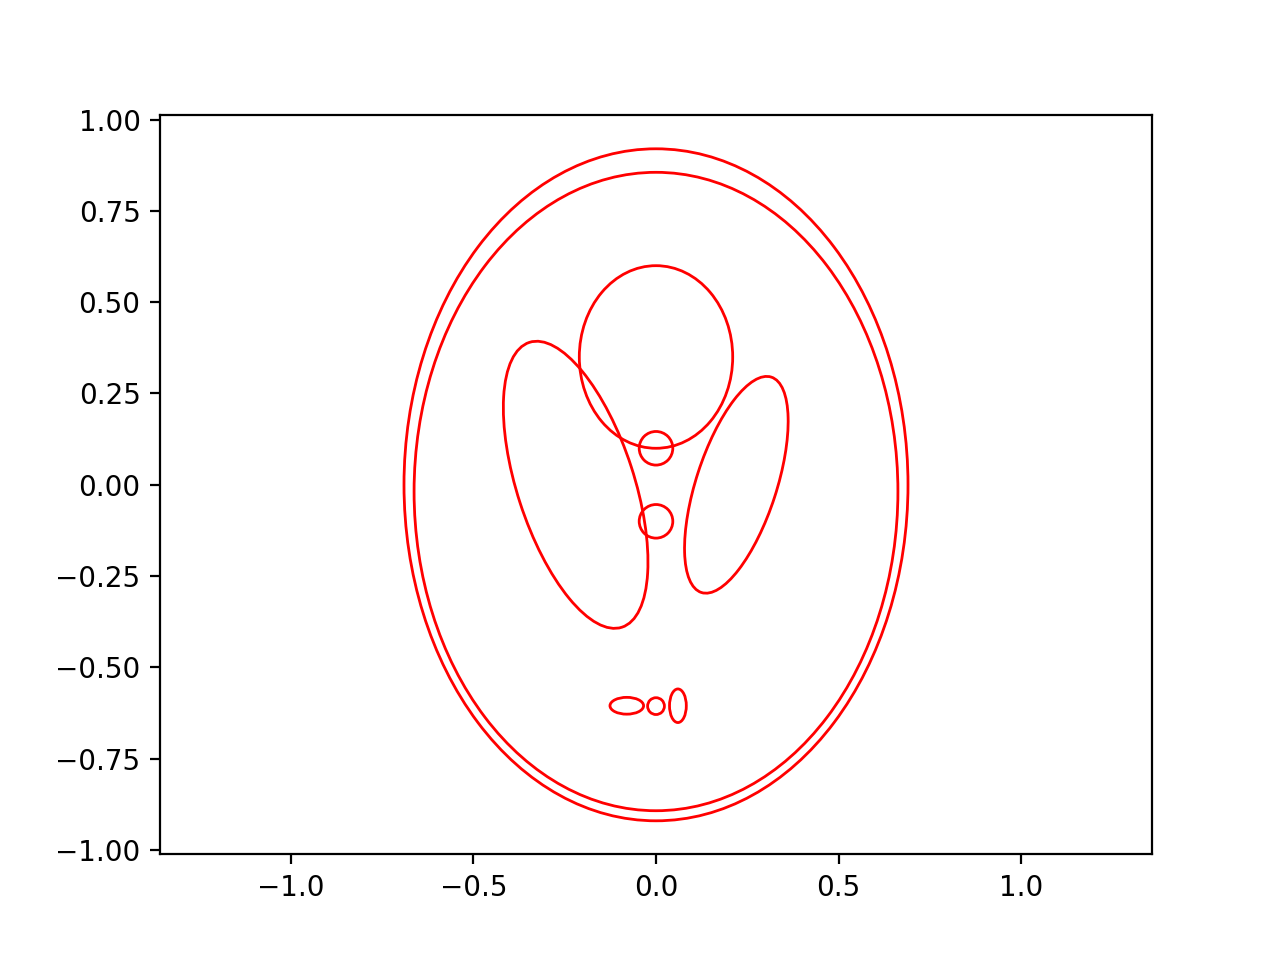

In [6]:
plt.figure()
ax = plt.gca()
for ellipse in p._ellipses:
    x = ellipse.x0
    y = ellipse.y0
    major = ellipse.a*2
    minor = ellipse.b*2
    angle_deg = ellipse.phi_deg
    ax.add_patch(matplotlib.patches.Ellipse((x, y), major, minor, angle_deg, 
                 edgecolor='r',
                 facecolor='none'))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('equal');

In [7]:
p

In [8]:
Nx = Ny = 256
#N1 = 32
#N2 = 256
#grid = RegularGrid(FFTRegularAxis(N1, d=1/2), FFTRegularAxis(N2, d=1/2))
grid = RegularGrid(RegularAxis.linspace(-1, 1, Nx), RegularAxis.linspace(-1, 1, Ny))

In [9]:
A = p.raster(grid)

In [10]:
A.shape

(256, 256)

<IPython.core.display.Javascript object>


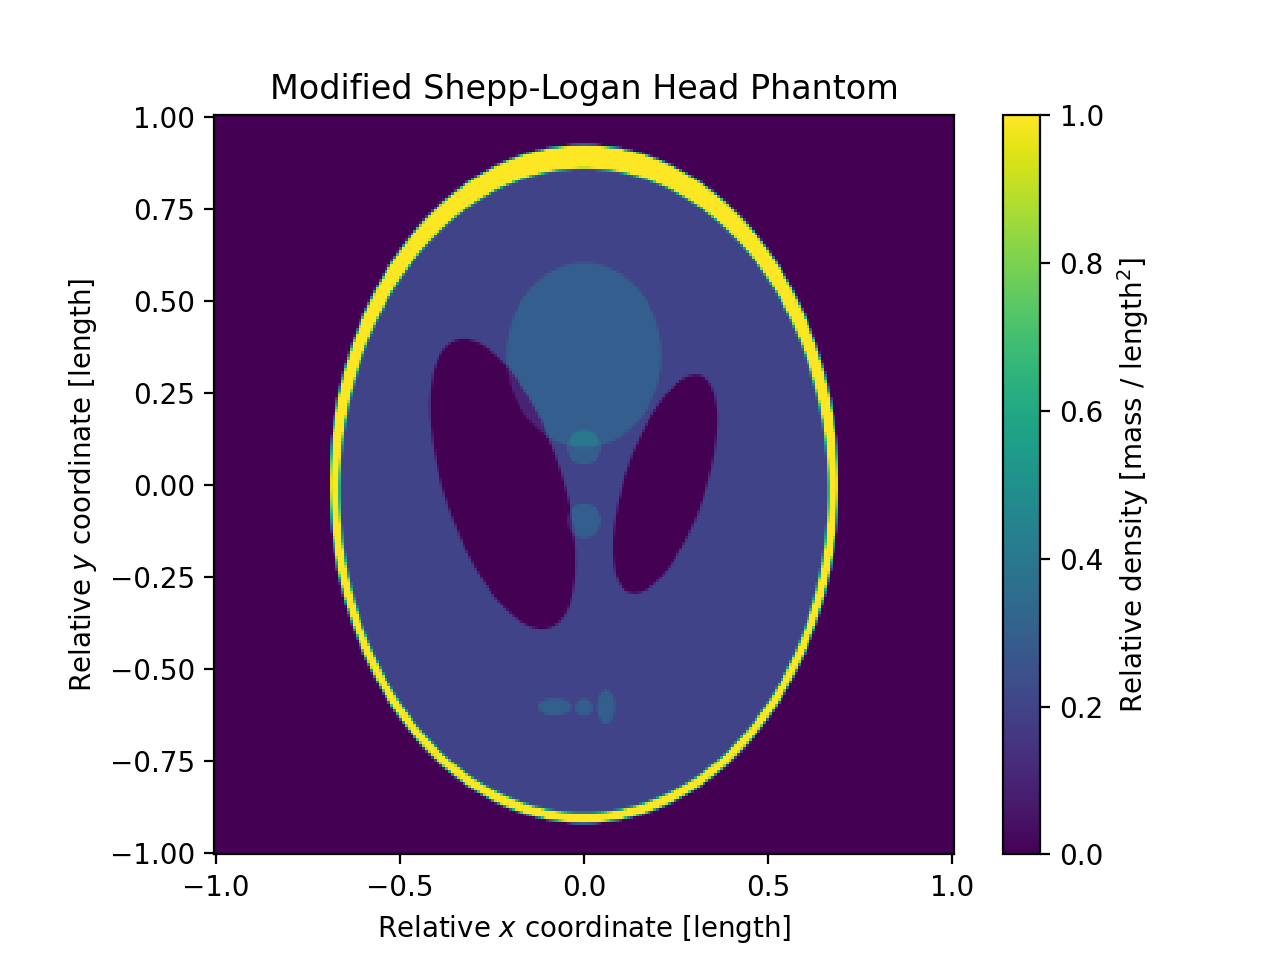

In [11]:
fig, ax = plt.subplots()
im = grid.imshow(ax, A)
cb = fig.colorbar(im)
ax.set_xlabel('Relative $x$ coordinate [length]')
ax.set_ylabel('Relative $y$ coordinate [length]')
cb.set_label('Relative density [mass / length$^2$]')
ax.set_title('Modified Shepp-Logan Head Phantom');

In [12]:
na = 256
theta_axis = RegularAxis.linspace(0, 180, na, endpoint=False)

nt = 256
t_axis = RegularAxis.linspace(-1, 1, nt)

sinogram_grid = RegularGrid(theta_axis, t_axis)

In [13]:
T = p.sinogram(sinogram_grid)
T_rect = p.sinogram(sinogram_grid, rect=True)

<IPython.core.display.Javascript object>


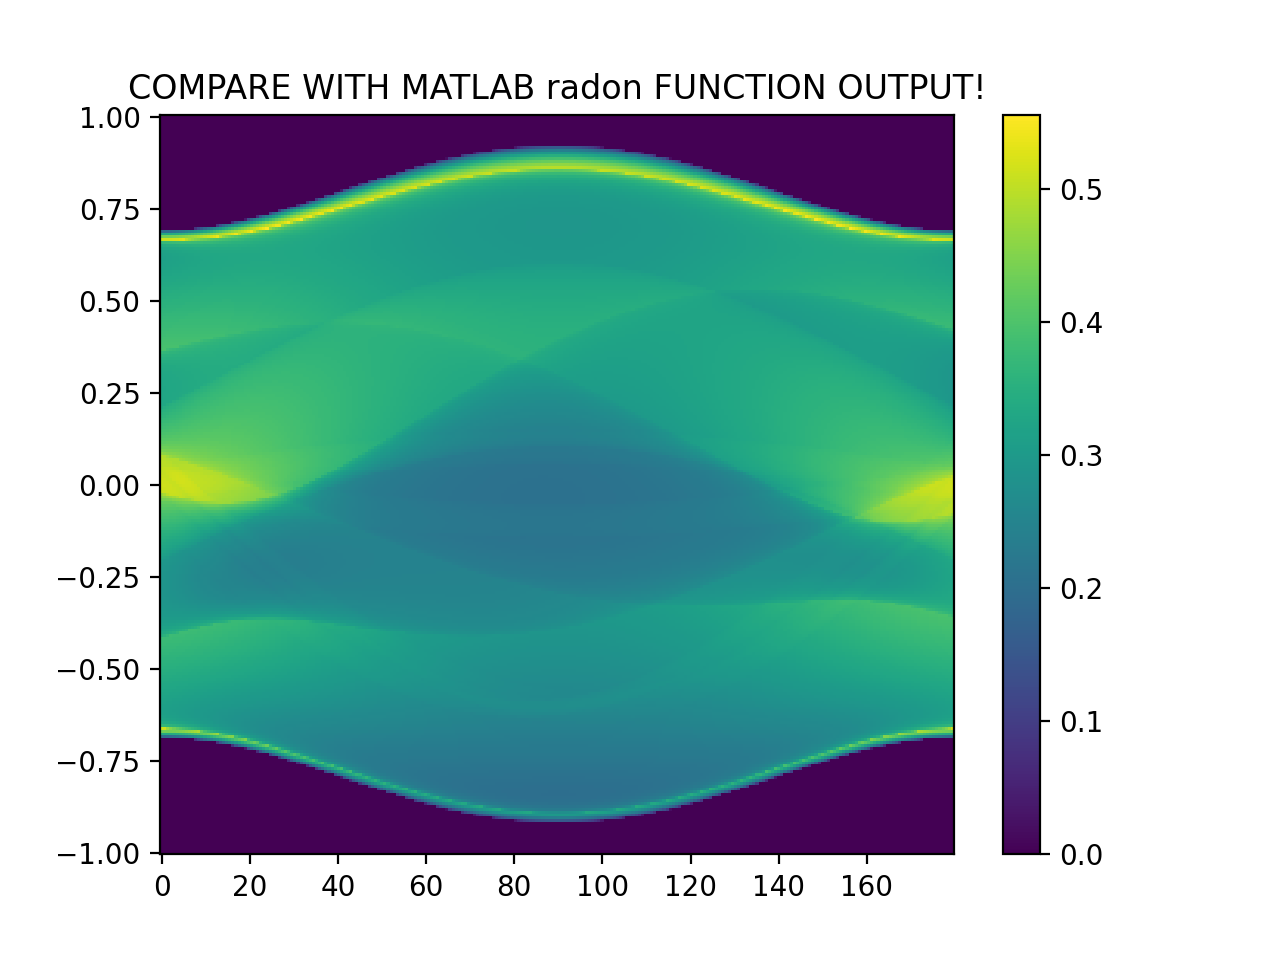

In [14]:
fig, ax = plt.subplots()
im = sinogram_grid.imshow(ax, T, aspect='auto')
fig.colorbar(im)
ax.set_title('COMPARE WITH MATLAB radon FUNCTION OUTPUT!');

<IPython.core.display.Javascript object>


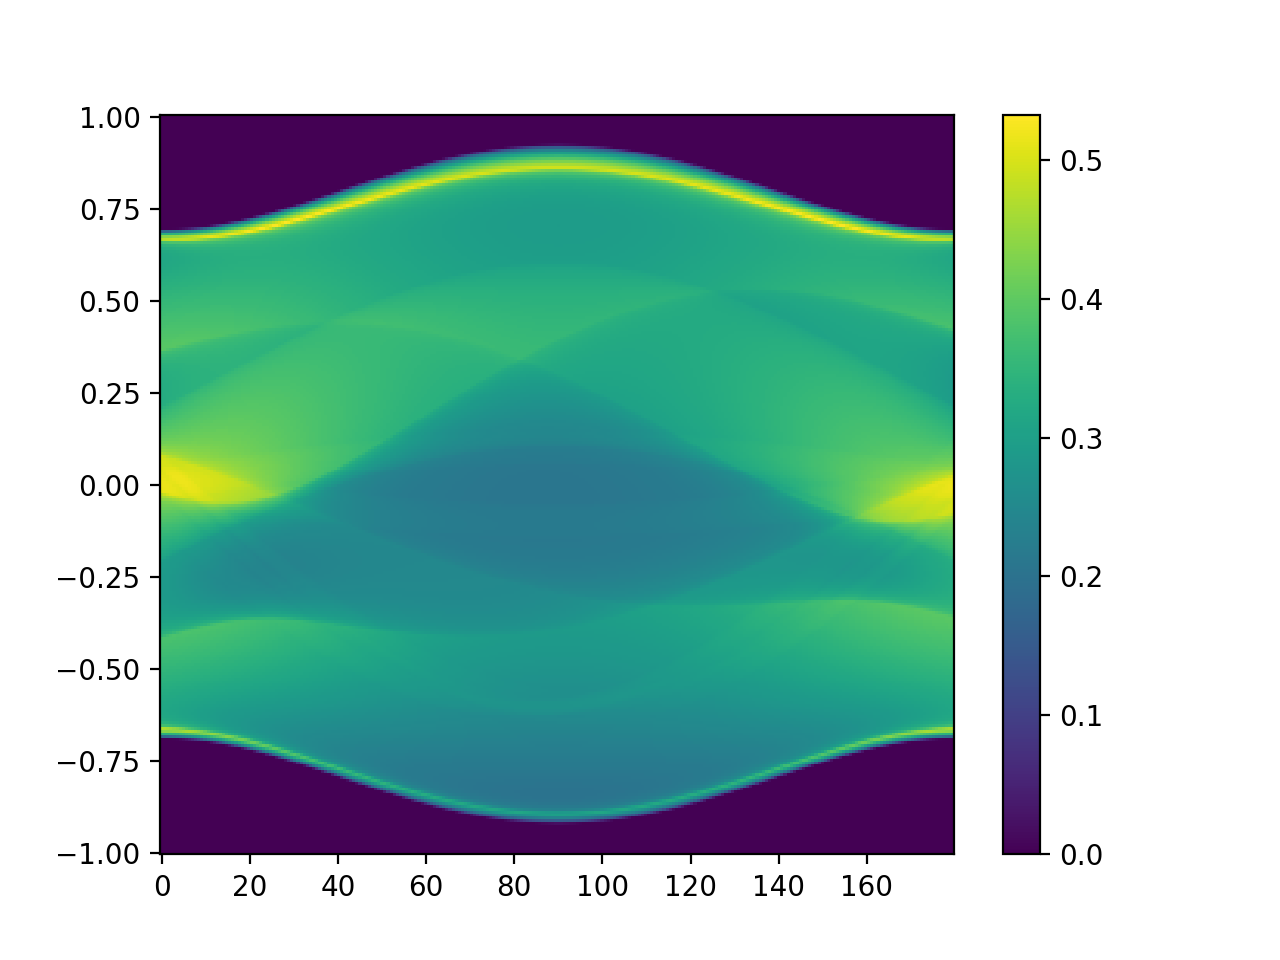

In [15]:
fig, ax = plt.subplots()
im = sinogram_grid.imshow(ax, T_rect, aspect='auto')
fig.colorbar(im)

<IPython.core.display.Javascript object>


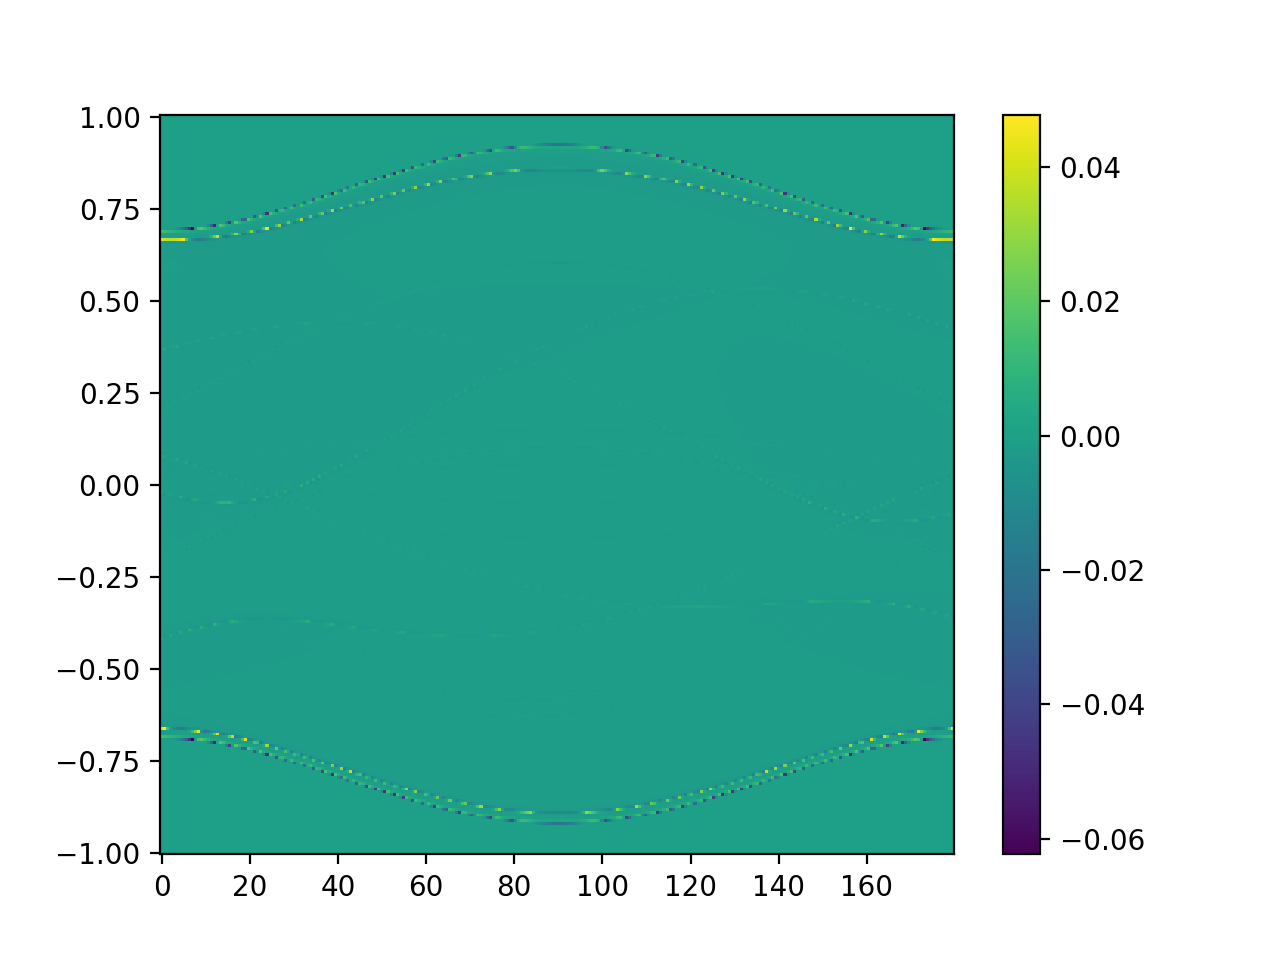

In [16]:
fig, ax = plt.subplots()
im = sinogram_grid.imshow(ax, T - T_rect, aspect='auto')
fig.colorbar(im)